In [1]:
!pip install symusic mido pretty_midi miditoolkit music21 matplotlib

In [2]:
!wget https://github.com/lzqlzzq/minimidi/raw/main/example/mahler.mid

--2023-11-26 16:29:28--  https://github.com/lzqlzzq/minimidi/raw/main/example/mahler.mid
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lzqlzzq/minimidi/main/example/mahler.mid [following]
--2023-11-26 16:29:28--  https://raw.githubusercontent.com/lzqlzzq/minimidi/main/example/mahler.mid
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478769 (468K) [audio/midi]
Saving to: ‘mahler.mid.4’

mahler.mid.4        100%[===================>] 467.55K  --.-KB/s    in 0.03s   

2023-11-26 16:29:28 (15.4 MB/s) - ‘mahler.mid.4’ saved [478769/478769]



# Load MIDI File

* print each objects in symusic could get the corresponding summaries
* Time unit is a quarter.
* A *pyi* file have been generated, you can browse the members and functions of each class in it.

In [1]:
from symusic import Score
score = Score("mahler.mid")
print("note_num: ", score.note_num())
print("start_time: ", score.start())
print("end_time: ", score.end())

note_num:  60411
start_time:  780
end_time:  1431755


In [2]:
print(score.tempos)
print(score.key_signatures)
print(score.time_signatures)

TempoTickList[Tempo(time=0, qpm=20.00), Tempo(time=720, qpm=100.00), Tempo(time=7200, qpm=120.00), Tempo(time=12960, qpm=64.00), Tempo(time=15840, qpm=60.00), Tempo(time=18000, qpm=55.00), Tempo(time=18660, qpm=20.00), Tempo(time=18720, qpm=50.00), Tempo(time=51360, qpm=40.00), Tempo(time=53280, qpm=34.00), Tempo(time=54240, qpm=20.00), Tempo(time=54720, qpm=40.00), Tempo(time=55200, qpm=34.00), Tempo(time=56160, qpm=20.00), Tempo(time=56640, qpm=40.00), Tempo(time=57120, qpm=34.00), Tempo(time=60480, qpm=50.00), Tempo(time=155040, qpm=100.00), Tempo(time=203040, qpm=109.00), Tempo(time=220320, qpm=120.00), Tempo(time=224160, qpm=140.00), Tempo(time=228000, qpm=120.00), Tempo(time=229920, qpm=109.00), Tempo(time=231840, qpm=100.00), Tempo(time=235680, qpm=69.00), Tempo(time=241440, qpm=40.00), Tempo(time=243360, qpm=50.00), Tempo(time=250920, qpm=20.00), Tempo(time=251040, qpm=50.00), Tempo(time=266400, qpm=60.00), Tempo(time=277920, qpm=50.00), Tempo(time=335520, qpm=40.00), Tempo(tim

In [3]:
print(score.tempos[0])
print(score.key_signatures[0])
print(score.time_signatures[0])

Tempo(time=0, qpm=20.00)
KeySignature(time=0, key=0, tonality=0)
TimeSignature(time=0, numerator=3, denominator=8)


In [4]:
print("track name: ", score.tracks[0].name)
print("is_drum: ", score.tracks[0].is_drum)
print("note_num: ", score.tracks[0].note_num())
print("start: ", score.tracks[0].start())
print("end: ", score.tracks[0].end())
print("notes[0]: ", score.tracks[0].notes[0])
print("notes[-1]: ", score.tracks[0].notes[-1])

track name:  PICCOLO
is_drum:  False
note_num:  1053
start:  2160
end:  1431755
notes[0]:  Note(time=2160, duration=4895, pitch=106, velocity=111)
notes[-1]:  Note(time=1423920, duration=7835, pitch=99, velocity=111)


In [5]:
note = score.tracks[0].notes[0]
print("start:\t\t", note.start)
print("duration:\t", note.duration)
print("pitch:\t\t", note.pitch)
print("velocity:\t", note.velocity)

start:		 2160
duration:	 4895
pitch:		 106
velocity:	 111


# Batch Processing

* sort
* shift_time
* shift_pitch
* shift_velocity
* clip(start: float, end: float, clip_end: bool)
* filter_notes(func: Callable)
* note_array

In [6]:
# inplace operation
print(score.sort())
print(score.tracks[0].sort())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
# method chaining
score.shift_time(10) \
     .shift_pitch(-6) \
     .shift_velocity(-7) \
     .sort()

In [19]:
score.tracks[1].clip(1000, 100000, True) # start: float, end: float, clip_end: bool

Track(name="PICCOLO", program=73, is_drum=False, notes=[Note(time=12960, duration=575, pitch=94, velocity=111), Note(time=13680, duration=575, pitch=92, velocity=111), Note(time=14400, duration=575, pitch=91, velocity=111), Note(time=15120, duration=575, pitch=89, velocity=111), Note(time=15840, duration=575, pitch=91, velocity=111), Note(time=16560, duration=575, pitch=89, velocity=111), Note(time=17280, duration=575, pitch=87, velocity=111), Note(time=18000, duration=575, pitch=85, velocity=111), Note(time=18720, duration=1150, pitch=84, velocity=31), Note(time=23520, duration=575, pitch=79, velocity=31), Note(time=23520, duration=575, pitch=67, velocity=31), Note(time=24240, duration=430, pitch=60, velocity=31), Note(time=24240, duration=430, pitch=72, velocity=31), Note(time=24720, duration=190, pitch=62, velocity=31), Note(time=24720, duration=190, pitch=74, velocity=31), Note(time=24960, duration=190, pitch=76, velocity=31), Note(time=24960, duration=190, pitch=64, velocity=31), 

frame_pianoroll float32 (128, 5966)
onset_pianoroll float32 (128, 5966)


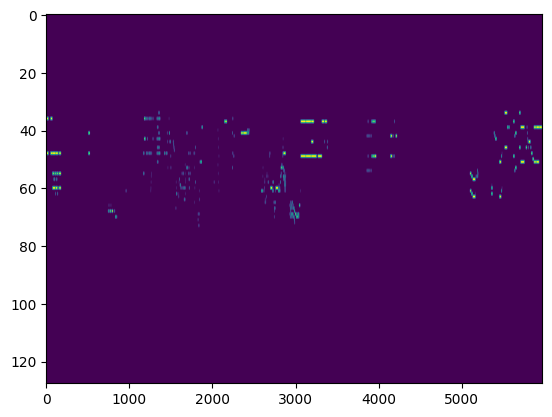

In [25]:
from matplotlib import pyplot as plt

frame_pianoroll = score.tracks[10].frame_pianoroll(960 / 4)
print("frame_pianoroll", frame_pianoroll.dtype, frame_pianoroll.shape)
onset_pianoroll = score.tracks[10].onset_pianoroll(960 / 4)
print("onset_pianoroll", onset_pianoroll.dtype, onset_pianoroll.shape)
plt.imshow(frame_pianoroll, aspect='auto')

# Benchmark

## MIDI Parsing

* mido is writen in pure python, and only parsing midi file to event level
* pretty_midi and miditoolkit is based on mido

In [14]:
# install julia for testing MIDI.jl
!pip install jill
!jill install -c True

JILL - Julia Installer 4 Linux (MacOS, Windows and FreeBSD) -- Light

querying release information from https://julialang-s3.julialang.org/bin/versions.json
julia 1.9.4 already installed.
True


In [15]:
import mido, music21
import pretty_midi as pm
import miditoolkit as mtk
p = "mahler.mid"

In [16]:
# %%timeit
# midi_jl.load(p)

In [17]:
%%timeit
Score(p)

23.3 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
# mido is writen in pure python, and only parsing midi file to event level
mido.MidiFile(p)

7.15 s ± 2.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
pm.PrettyMIDI(p)

7.1 s ± 1.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
mtk.MidiFile(p)

6.73 s ± 1.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
music21.converter.parse(p)

10.2 s ± 558 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
jl_script = f"""
import Pkg
Pkg.add("MIDI")
Pkg.add("BenchmarkTools")
using BenchmarkTools
using MIDI
b = @benchmark load("{p}")
println("first run: ", b)
b = @benchmark load("{p}")
println("scecond run: ", b)
"""
with open("bench.jl", "w") as f:
  f.write(jl_script)

In [23]:
!julia bench.jl

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
first run: Trial(132.627 ms)
scecond run: Trial(132.829 ms)


## Bench Processing


In [24]:
score = Score(p)
score2 = score.copy()

In [25]:
%%timeit
score.copy()

276 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%%timeit
score.shift_pitch(10)

364 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%%timeit
[(t.onset_pianoroll(960 / 4), t.frame_pianoroll(960 / 4)) for t in score.tracks]

10.3 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
